In [39]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# To plot pretty figures
%matplotlib inline
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] =  14



In [25]:

data_mem_rasp3 = pd.read_csv("/Users/salesfilho/Downloads/mem_rasp3.csv", sep=',')

data_mem_rasp4 = pd.read_csv("/Users/salesfilho/Downloads/mem_rasp4.csv", sep=',')

data_mem_rasp3.columns=['Tempo', 'Memoria livre']
data_mem_rasp4.columns=['Tempo', 'Memoria livre']




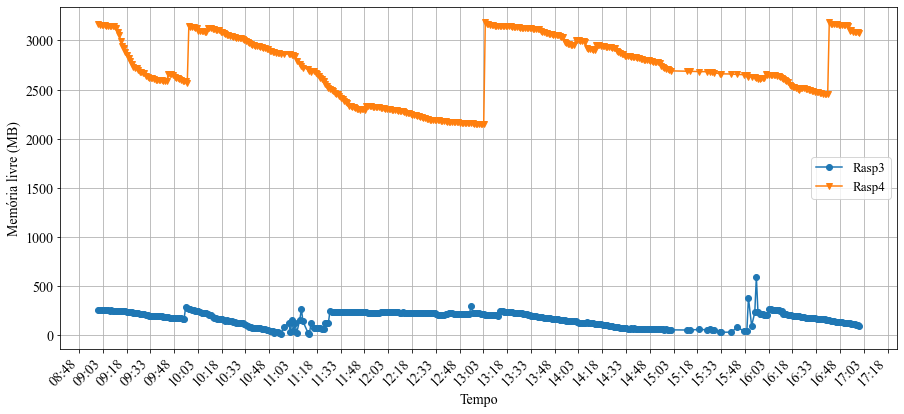

In [52]:
df = data_mem_rasp3.copy()
df.columns = ['Tempo', 'Rasp3']
df['Rasp4'] = data_mem_rasp4['Memoria livre']
df['Tempo'] = pd.to_datetime(df['Tempo'])

df['Rasp3'] = df['Rasp3']/1000000
df['Rasp4'] = df['Rasp4']/1000000

df = df.set_index('Tempo')
df.dropna()
#df.set_index(DatetimeIndex(df['Tempo']))


fig, ax = plt.subplots(figsize=(15,7))

# Plot rasp3
df['Rasp3'].plot(ax=ax,marker='o')

# Plot rasp4
df['Rasp4'].plot(ax=ax,marker='v')

# Set title and labels for axes
ax.set(xlabel="Tempo",
       ylabel="Uso Megabyte")
# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=15))
#ax.grid(axis='y')
ax.grid()
plt.ylabel('Memória livre (MB)')
ax.legend(fontsize=13)

plt.savefig('/Users/fred/Downloads/rasp_memory.pdf', bbox_inches='tight')

plt.show()






In [ ]:
data_mem_rasp3= data_mem_rasp3.iloc[:,0:3]
data_mem_rasp4= data_mem_rasp4.iloc[:,0:3]

data_mem_rasp3.rename(columns={"Time": "tempo", "Available memory": "memoria_disponivel"},inplace=True)
data_mem_rasp4.rename(columns={"Time": "tempo", "Available memory": "memoria_disponivel"},inplace=True)

#RASP4
data_mem_rasp4['memoria_disponivel'] = data_mem_rasp4['memoria_disponivel']/1000000
#RASP3
data_mem_rasp3['memoria_disponivel'] = data_mem_rasp3['memoria_disponivel']/1000000